# Language Detection - Nepali / Hindi.
- Prepared by: <a href = 'https://github.com/sagsshakya'> Sagun Shakya </a>
- MSc. Data Science
- GITAM Institute of Science, Visakhapatnam.
- Email: sags.shakya@gmail.com

- Here, we deploy classification algorithms like Naive Bayes Model, Random Forest Model and Logistic Regression to identify whether the given language is Nepali (0) or Hindi(1).
- The Vectorizer used is TFIDF.
- The hyperparameters are tuned using RandomizedSearchCV.

### Importing necessary libraries.

In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import re

In [2]:
os.chdir(r'C:\Users\acer\Desktop\PythonProgramming\Nepali_Hindi Language Classification')

### Loading the pickled files that contain cleaned texts.

In [3]:
nepali_df = pickle.load(open('nepali_sample_cleaned.pkl', 'rb'))
hindi_df = pickle.load(open('hindi_sample_cleaned.pkl', 'rb'))


### Adding labels to the dataframe as Nepali / Hindi.
- Nepali: 0
- Hindi: 1

In [4]:
nepali_df['label'] = np.zeros(nepali_df.shape[0])
hindi_df['label'] = np.ones(hindi_df.shape[0])

In [5]:
nepali_df['label'] = nepali_df.label.astype(int)
hindi_df['label'] = hindi_df.label.astype(int)

### Merging the two dataframes.

In [6]:
merged_df = pd.concat([nepali_df, hindi_df], ignore_index=True)

In [7]:
df = merged_df.copy()

### Shuffling the dataframe rows.


In [8]:
def shuffle(dataframe, random_state = 100):
     dd = dataframe.copy()
     dd = dd.sample(frac = 1, random_state = 100)
     dd.reset_index(drop = True, inplace = True)
     return dd

In [9]:
df = shuffle(df, 42)
df.head(20)

,0,label
0,फ्लैशबैक,1
1,रंगदारी गोलीकांड पुलिस के हाथ खाली,1
2,एमाले अध्यक्ष केपी ओली दोस्रो पटक प्रधानमन्त्र...,0
3,भूमि व्यवस्था सहकारी तथा गरिबी निवारणमन्त्री प...,0
4,हाम्रा जनप्रतिनिधि र सरकारी संयन्त्र कतिसम्म अ...,0
5,भारतीय प्रधानमन्त्री नरेन्द्र मोदीले प्रधानमन्...,0
6,तपाईको प्रतिक्रिया समीक्षामा भएकोले प्रकाशित भ...,0
7,नेपाल मजदुर किसान पार्टीका सांसद प्रेम सुवालले...,0
8,मजदूरों से भरा ऑटो पलटा एक मरा जख्मी,1
9,आफू महाअभियोग प्रस्ताव दर्ता हुनु केही समय अगा...,0


In [10]:
df.shape

(40000, 2)

### Train - Test Split.

In [11]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [12]:
# Dependent and Independent Features.
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 100)

### Vectorizing the texts using TFIDF Vectorizer.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer as TFIDF

In [15]:
tfidf = TFIDF(ngram_range=(1,3))

In [16]:
X_train_vectorized = tfidf.fit_transform(X_train)
X_test_vectorized = tfidf.transform(X_test)

### Classification using Multinomial Bayes.

In [17]:
from sklearn.naive_bayes import MultinomialNB

In [18]:
classifier_NB = MultinomialNB()

In [19]:
params_for_random_search = {'alpha':[.00001, .0001, .001, .01, .1, 1.0],
                           'fit_prior': [True, False]}

In [20]:
model = RandomizedSearchCV(estimator= classifier_NB,
                           param_distributions= params_for_random_search,
                           n_iter= 75,
                           n_jobs=1,
                           random_state=42,
                           cv = 5,
                           return_train_score= False
                          )

In [21]:
model.fit(X_train_vectorized, y_train)

C:\Users\acer\PycharmProjects\untitled\venv\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 12 is smaller than n_iter=75. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                           fit_prior=True),
                   iid='warn', n_iter=75, n_jobs=1,
                   param_distributions={'alpha': [1e-05, 0.0001, 0.001, 0.01,
                                                  0.1, 1.0],
                                        'fit_prior': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [22]:
results_NB = pd.DataFrame(model.cv_results_)
results_NB

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_prior,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.085780,0.013989,0.015797,0.003059,True,1e-05,"{'fit_prior': True, 'alpha': 1e-05}",0.956726,0.957344,0.954844,0.956406,0.955774,0.956219,0.000854,10
1,0.066986,0.001789,0.012395,0.000489,False,1e-05,"{'fit_prior': False, 'alpha': 1e-05}",0.956726,0.957344,0.954844,0.956406,0.955931,0.956250,0.000840,9
2,0.080182,0.008399,0.017197,0.004353,True,0.0001,"{'fit_prior': True, 'alpha': 0.0001}",0.962506,0.960938,0.959844,0.961562,0.961400,0.961250,0.000869,8
3,0.068984,0.002097,0.013597,0.000801,False,0.0001,"{'fit_prior': False, 'alpha': 0.0001}",0.962506,0.960938,0.959844,0.961562,0.961556,0.961281,0.000876,7
4,0.069577,0.000788,0.013196,0.000400,True,0.001,"{'fit_prior': True, 'alpha': 0.001}",0.968599,0.966719,0.966250,0.967656,0.969839,0.967812,0.001295,4
5,0.068583,0.003498,0.012999,0.001549,False,0.001,"{'fit_prior': False, 'alpha': 0.001}",0.968755,0.966719,0.966406,0.967656,0.969839,0.967875,0.001279,3
6,0.067984,0.002190,0.012399,0.000489,True,0.01,"{'fit_prior': True, 'alpha': 0.01}",0.972036,0.970625,0.968906,0.968437,0.972027,0.970406,0.001514,2
7,0.071184,0.001938,0.013397,0.000802,False,0.01,"{'fit_prior': False, 'alpha': 0.01}",0.972192,0.970938,0.968906,0.968437,0.972339,0.970562,0.001626,1
8,0.069585,0.000490,0.011996,0.000632,True,0.1,"{'fit_prior': True, 'alpha': 0.1}",0.965787,0.963750,0.961406,0.961875,0.964526,0.963469,0.001635,5
9,0.068585,0.000490,0.013196,0.000400,False,0.1,"{'fit_prior': False, 'alpha': 0.1}",0.965630,0.963750,0.961406,0.962187,0.964057,0.963406,0.001482,6


In [23]:
print(model.best_params_)

{'fit_prior': False, 'alpha': 0.01}


In [24]:
print(model.best_score_)

0.9705625


In [25]:
print(model.best_index_)    
# The index (of the cv_results_ arrays) which corresponds to the best candidate parameter setting.

7


In [26]:
model.best_estimator_

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=False)

### Selecting the best estimator.

In [27]:
classifier_new = model.best_estimator_
classifier_new.fit(X_train_vectorized, y_train)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=False)

In [28]:
predictions = classifier_new.predict(X_test_vectorized)

### Confusion Matrix:

In [29]:
from sklearn import metrics
import itertools
import matplotlib.pyplot as plt

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


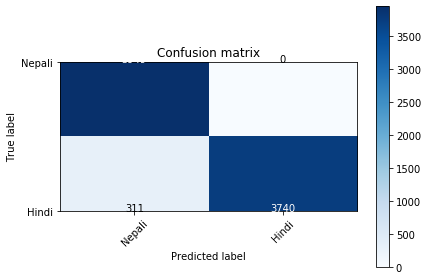

In [31]:
cm = metrics.confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes=['Nepali', 'Hindi'])

### Model Performance:

In [32]:
def accuracy_check(print_values = True):
    if print_values == True:
        print('Accuracy (in %) = ',round(float(metrics.accuracy_score(y_test, predictions) ) *100, 2), '%')
        print('ROC - AUC Score (in %) = ',round(float(metrics.roc_auc_score(y_test, predictions) ) *100, 2), '%')
        print('F1 - Score (in %) = ',round(float(metrics.f1_score(y_test, predictions) ) *100, 2), '%')

    '''acc_dict = dict()
    acc_dict['Accuracy Score'] = metrics.accuracy_score(y_test, predictions
    acc_dict['ROC - AUC Score'] = metrics.roc_auc_score(y_test, predictions)
    acc_dict['F1 - Score'] = metrics.f1_score(y_test, predictions) '''   
    return (round(float(metrics.accuracy_score(y_test, predictions) ) *100, 2),
            round(float(metrics.roc_auc_score(y_test, predictions) ) *100, 2),
            round(float(metrics.f1_score(y_test, predictions) ) *100, 2)
           )

In [33]:
accuracy_check()

Accuracy (in %) =  96.11 %
ROC - AUC Score (in %) =  96.16 %
F1 - Score (in %) =  96.01 %


(96.11, 96.16, 96.01)

##### The results are fairly accurate using Naive bayes Model. Let's see if we can improve the performance using Random Forest and Logistic Regression.

<hr><hr>

## Classification using Random Forest.

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
classifier_RF = RandomForestClassifier()

In [36]:
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

In [37]:
model1 = RandomizedSearchCV(estimator= classifier_RF,
                           param_distributions= parameters,
                           n_iter= 75,
                           n_jobs=1,
                           random_state=42,
                           cv = 5,
                           return_train_score= False
                          )

In [38]:
model1.fit(X_train_vectorized, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

### Fitting into the best model.

In [39]:
classifier_new = model1.best_estimator_
classifier_new.fit(X_train_vectorized, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
predictions = classifier_new.predict(X_test_vectorized)

### Confusion Matrix.

Confusion matrix, without normalization


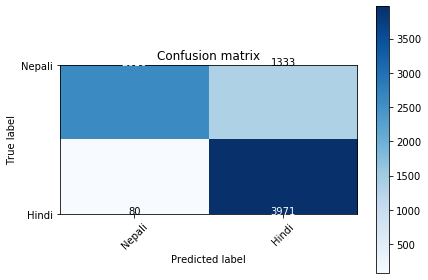

In [41]:
cm = metrics.confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes=['Nepali', 'Hindi'])

### Model Performance:

In [42]:
accuracy_check()

Accuracy (in %) =  82.34 %
ROC - AUC Score (in %) =  82.13 %
F1 - Score (in %) =  84.9 %


(82.34, 82.13, 84.9)

#### Random Forest Classifier doesn't do well compared to Naive Bayes Classifier.

<hr><hr>

# Classification using Logistic Regression.

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
classifier_LR = LogisticRegression()

In [45]:
parameters_for_logistic_regession = {'C': [1/100, 1/10, 1, 10, 100], 'fit_intercept': [True, False]}

In [46]:
model2 = RandomizedSearchCV(estimator= classifier_LR,
                           param_distributions= parameters_for_logistic_regession,
                           n_iter= 75,
                           n_jobs=1,
                           random_state=42,
                           cv = 5,
                           return_train_score= False
                          )

In [47]:
model2.fit(X_train_vectorized, y_train)

C:\Users\acer\PycharmProjects\untitled\venv\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 10 is smaller than n_iter=75. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\acer\PycharmProjects\untitled\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=75, n_jobs=1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'fit_intercept': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, 

### Fitting into the best model.

In [49]:
classifier_new = model2.best_estimator_
classifier_new.fit(X_train_vectorized, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
predictions = classifier_new.predict(X_test_vectorized)

### Confusion Matrix.

Confusion matrix, without normalization


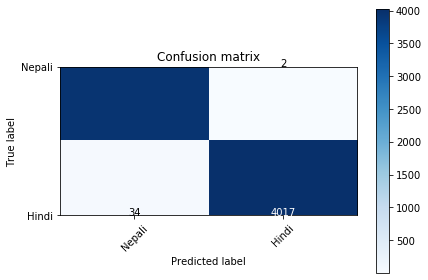

In [51]:
cm = metrics.confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes=['Nepali', 'Hindi'])

### Model Performance:

In [52]:
accuracy_check()

Accuracy (in %) =  99.55 %
ROC - AUC Score (in %) =  99.56 %
F1 - Score (in %) =  99.55 %


(99.55, 99.56, 99.55)

##### Hence, the best classifier is the Logistic Regression with C = 100.

<hr><hr>

## Testing with external TEXT.

In [53]:
test_nepali =['क्तपुरको मध्यपुरथिमी नगरपालिका १ का वडाध्यक्ष सुरज खड्का लकडाउनका बेला पनि बिहान सबेरै घरबाट निस्किन्छन् र साँझ अबेरमात्रै फर्किन्छन्\
सरकारी संरचनाको सबैभन्दा तल्लो निकाय वडा कार्यालयको प्रमुख भएका नाताले अहिल उनको व्यस्तता बढेको छ']

In [54]:
classifier_new.predict(tfidf.transform(test_nepali))

array([0])

In [55]:
test_hindi = ['संदिग्ध हालत में युवती लापता अज्ञात पर अगवा करने का केस दर्ज']

In [56]:
classifier_new.predict(tfidf.transform(test_hindi))

array([1])

<hr><hr>

### Pickling the finalized optimum model into disk.¶

In [57]:
pickle.dump(classifier_new, open('Logistic_regression_model.sav', 'wb'))

<hr>

# The End.